# Report on CODS analysis

- We perform the CODS analysis w/ bootstraping (assuming 512 realizations) for our synthetic datasets

In [1]:
# In the root of the repo run "pip install --editable ."

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [67]:
from src.data.import_data import import_df_from_zip_pkl, import_df_info_from_zip, import_df_info_from_zip
import rdtools
import pickle
import time
import matplotlib.pyplot as plt
import sys
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib.offsetbox import AnchoredText
import matplotlib as mpl
label_size = 16
mpl.rcParams["xtick.labelsize"] = label_size 
mpl.rcParams["ytick.labelsize"] = label_size 

In [22]:
def load_cods_results(synth_type, index=0, clipping="basic", verbose=False):
    """
    
    """
    # Load results
    try:
        _file         = open("../data/processed/soil_basic/cods_results_" + synth_type + "_" + str(index) + "_" + str(clipping) + ".pkl", "rb")
        print (_file)
    except:
        if verbose:
            print("No available synthetic dataset, the availabe types are 'basic', 'soil', 'soil_weather', 'weather'")
    
    cods_instance = pickle.load(_file)
    
    return cods_instance

In [24]:
# check loading CODS results
cods_instance = load_cods_results("soil", index=i, clipping="basic", verbose=False)

<_io.BufferedReader name='../data/processed/soil_basic/cods_results_soil_49_basic.pkl'>


In [25]:
results_df = cods_instance.result_df
results_df.head()

,soiling_ratio,soiling_rates,cleaning_events,seasonal_component,degradation_trend,total_model,residuals,SR_low,SR_high,rates_low,rates_high,bt_soiling_ratio,bt_soiling_rates,seasonal_low,seasonal_high,model_low,model_high
datetime,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00-05:00,0.968402,0.000727,0.079185,0.993102,1.000000,0.883864,0.919101,0.954312,0.984528,-0.000829,0.001423,0.968406,0.000805,0.989008,0.996238,0.884963,0.903975
2015-01-02 00:00:00-05:00,0.969067,0.000602,0.018645,0.993148,0.999977,0.884491,0.917392,0.955215,0.984251,-0.000641,0.001417,0.969216,0.000808,0.989073,0.996328,0.885823,0.903405
2015-01-03 00:00:00-05:00,0.969623,0.000511,0.010988,0.993196,0.999953,0.885021,0.915761,0.956101,0.984563,-0.000663,0.001413,0.970011,0.000793,0.989079,0.996445,0.886630,0.902492
2015-01-04 00:00:00-05:00,0.970106,0.000454,0.006029,0.993248,0.999930,0.885487,0.914229,0.956642,0.984865,-0.000612,0.001410,0.970798,0.000785,0.989086,0.996513,0.887368,0.902457
2015-01-05 00:00:00-05:00,0.970546,0.000425,0.009718,0.993302,0.999906,0.885915,0.912689,0.956228,0.985398,-0.000754,0.001408,0.971574,0.000773,0.989105,0.996581,0.887939,0.903167


In [15]:
# Run CODS algorithm wo bootstrap

synth_type = "soil"
index      = 40
path_to_zip_pkl_pi = "../data/raw/synthetic_" + synth_type + "_pi_daily.zip"
df = import_df_from_zip_pkl(path_to_zip_pkl_pi, index=index, verbose=True, minofday=False)

time for importing dataframe: 0.00 seconds


In [16]:
df.head()

,Power,Degradation,Soiling,Faults,PI_clipping_basic,PI_clipping_flexible,PI_clipping_universal
datetime,,,,,,,
2015-01-01 00:00:00-05:00,305.870139,0.99998,0.99598,1,0.883356,0.883356,0.772812
2015-01-02 00:00:00-05:00,306.782639,0.99995,0.99397,1,0.881933,0.881933,0.772190
2015-01-03 00:00:00-05:00,307.806250,0.99993,0.99195,1,0.880448,0.880448,0.771251
2015-01-04 00:00:00-05:00,308.943750,0.99991,0.98994,1,0.879057,0.879057,0.770541
2015-01-05 00:00:00-05:00,310.221528,0.99988,0.98793,1,0.877681,0.877681,0.770002


In [28]:
cods_instance = load_cods_results("soil", index=1, clipping="basic", verbose=False)
result_df     = cods_instance.result_df
result_df.info()

<_io.BufferedReader name='../data/processed/soil_basic/cods_results_soil_1_basic.pkl'>
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2015-01-01 00:00:00-05:00 to 2019-12-31 00:00:00-05:00
Freq: D
Data columns (total 17 columns):
soiling_ratio         1826 non-null float64
soiling_rates         1826 non-null float64
cleaning_events       1826 non-null float64
seasonal_component    1826 non-null float64
degradation_trend     1826 non-null float64
total_model           1826 non-null float64
residuals             1826 non-null float64
SR_low                1826 non-null float64
SR_high               1826 non-null float64
rates_low             1826 non-null float64
rates_high            1826 non-null float64
bt_soiling_ratio      1826 non-null float64
bt_soiling_rates      1826 non-null float64
seasonal_low          1826 non-null float64
seasonal_high         1826 non-null float64
model_low             1826 non-null float64
model_high            1826 non-null float64
dt

In [123]:
def cods_process_results_one(synth_type, index=0, clipping="basic", verbose="False"):
    """
    """
    # synthetic time series
    path_to_zip = "../data/raw/synthetic_" + synth_type + ".zip"
    df          = import_df_from_zip_pkl(path_to_zip, index=index, verbose=verbose)
    # normalized time series
    path_to_zip_pkl_pi = "../data/raw/synthetic_" + synth_type + "_pi_daily.zip"
    df_norm            = import_df_from_zip_pkl(path_to_zip_pkl_pi, index=index, verbose=verbose, minofday=False)
    # info - take it outside?
    df_info = import_df_info_from_zip(path_to_zip, verbose=verbose)
    rd_true = df_info.Degradation_rate_linear.iloc[index]*100
    cods_instance = load_cods_results(synth_type, index=index, clipping=clipping, verbose=verbose)
    result_df     = cods_instance.result_df
    # PI
    pi_est        = result_df.total_model
    if clipping=="basic":
        pi_true = df_norm.PI_clipping_basic
    elif clipping=="flexible":
        pi_true = df_norm.PI_clipping_flexible
    elif clippling=="universal":
        pi_true = df_norm.PI_clipping_universal
    else:
        sys.exit("Function for removing clipping not implemented!")
    rmse_pi = mean_squared_error(pi_true, pi_est, squared=False)
    # Degradation rate
    rd_est  = cods_instance.degradation
    rmse_rd = mean_squared_error([rd_true], [rd_est[0]], squared=False)
    # Soiling
    sr_est  = result_df.soiling_ratio
    sr_true = df_norm.Soiling
    rmse_sr = mean_squared_error(sr_true, sr_est, squared=False)
    
    return ([rmse_pi, pi_true, pi_est], [rmse_rd, rd_true, rd_est], [rmse_sr, sr_true, sr_est])

def find_extrema_rmse(rmse, true, est):
    """
    """
    index_min = np.argmin(rmse)
    index_max = np.argmax(rmse)
    min_true  = true[index_min]
    min_est   = est[index_min]
    max_true  = true[index_max]
    max_est   = est[index_max]
    
    return (index_min, index_max, min_true, min_est, max_true, max_est)

def cods_process_results_all(synth_type, clipping="basic", verbose="False"):
    rmse_pi = np.zeros(50)
    rmse_rd = np.zeros(50)
    rmse_sr = np.zeros(50)
    pi_true = {}
    pi_est  = {}
    rd_true = np.zeros(50)
    rd_est  = np.zeros((50, 3))
    sr_true = {}
    sr_est  = {}
    for i in range(0, 50):
        _pi, _rd, _sr = cods_process_results_one(synth_type, index=i, clipping=clipping, verbose=verbose)
        rmse_pi[i]    = _pi[0]
        rmse_rd[i]    = _rd[0]
        rmse_sr[i]    = _sr[0]
        pi_true[i]    = _pi[1]
        pi_est[i]     = _pi[2]
        rd_true[i]    = _rd[1]
        rd_est[i]     = _rd[2]
        sr_true[i]    = _sr[1]
        sr_est[i]     = _sr[2]
    # Find best and worst PI time series 
    index_min, index_max, min_true, min_est, max_true, max_est = find_extrema_rmse(rmse_pi, pi_true, pi_est)
    pi = [rmse_pi[index_min], rmse_pi[index_max], min_true, min_est, max_true, max_est]
    # Find best and worst SR time series
    index_min, index_max, min_true, min_est, max_true, max_est = find_extrema_rmse(rmse_sr, sr_true, sr_est)
    sr = [rmse_sr[index_min], rmse_sr[index_max], min_true, min_est, max_true, max_est]
    
    return (pi, [rmse_rd, rd_true, rd_est], sr)

## Soil + basic clipping

In [124]:
pi, rd, sr = cods_process_results_all("soil", clipping="basic", verbose="False")

<_io.BufferedReader name='../data/processed/soil_basic/cods_results_soil_0_basic.pkl'>
<_io.BufferedReader name='../data/processed/soil_basic/cods_results_soil_1_basic.pkl'>
<_io.BufferedReader name='../data/processed/soil_basic/cods_results_soil_2_basic.pkl'>
<_io.BufferedReader name='../data/processed/soil_basic/cods_results_soil_3_basic.pkl'>
<_io.BufferedReader name='../data/processed/soil_basic/cods_results_soil_4_basic.pkl'>
<_io.BufferedReader name='../data/processed/soil_basic/cods_results_soil_5_basic.pkl'>
<_io.BufferedReader name='../data/processed/soil_basic/cods_results_soil_6_basic.pkl'>
<_io.BufferedReader name='../data/processed/soil_basic/cods_results_soil_7_basic.pkl'>
<_io.BufferedReader name='../data/processed/soil_basic/cods_results_soil_8_basic.pkl'>
<_io.BufferedReader name='../data/processed/soil_basic/cods_results_soil_9_basic.pkl'>
<_io.BufferedReader name='../data/processed/soil_basic/cods_results_soil_10_basic.pkl'>
<_io.BufferedReader name='../data/processe

**Performance index**

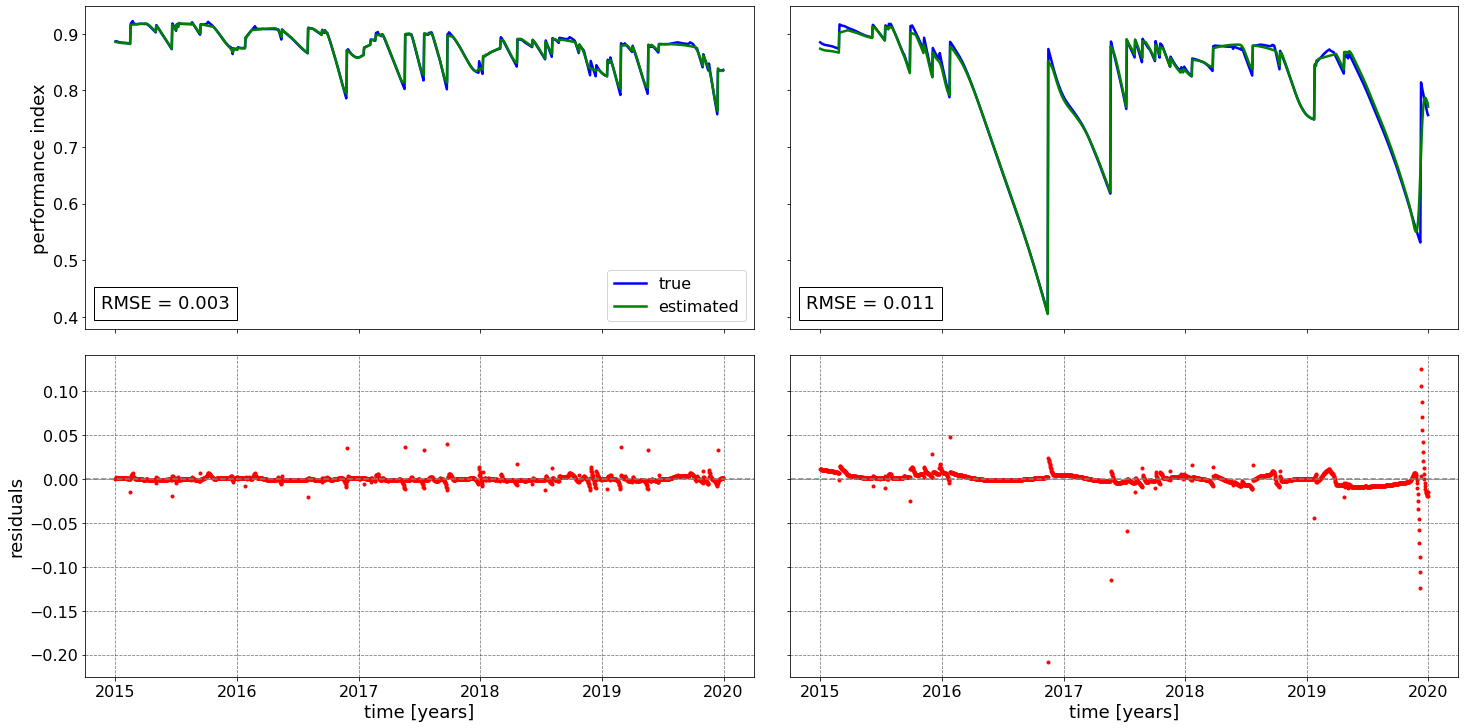

In [167]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10), sharex=True, sharey="row")
fig.tight_layout()


ax[0, 0].plot(pi[2].index, pi[2], color="blue", lw=2.5, ls="-", label="true")
ax[0, 0].plot(pi[3].index, pi[3], color="green", lw=2.5, ls="-", label="estimated")
ax[1, 0].plot(pi[2].index, pi[2]-pi[3], "r.")
text = AnchoredText(("RMSE = %.3f" %pi[0]), loc=3, prop=dict(size=18))
ax[0, 0].add_artist(text)
ax[0, 0].legend(loc=4, fontsize=16)

ax[0, 1].plot(pi[4].index, pi[4], color="blue", lw=2.5, ls="-", label="true")
ax[0, 1].plot(pi[5].index, pi[5], color="green", lw=2.5, ls="-", label="estimated")
ax[1, 1].plot(pi[4].index, pi[4]-pi[5], "r.")
text = AnchoredText(("RMSE = %.3f" %pi[1]), loc=3, prop=dict(size=18))
ax[0, 1].add_artist(text)

ax[0, 0].set_ylabel("performance index", fontsize=18)
ax[1, 0].set_ylabel("residuals", fontsize=18)
ax[1, 0].set_xlabel("time [years]", fontsize=18)
ax[1, 1].set_xlabel("time [years]", fontsize=18)
ax[1, 0].grid(which="both", ls="--", color="k", alpha=0.5)
ax[1, 0].axhline(0., color="grey", ls="--")
ax[1, 1].grid(which="both", ls="--", color="k", alpha=0.5)
ax[1, 1].axhline(0., color="grey", ls="--")

**Degradation rate**

the RMSE for the degradation rate is 0.353 percentage/year


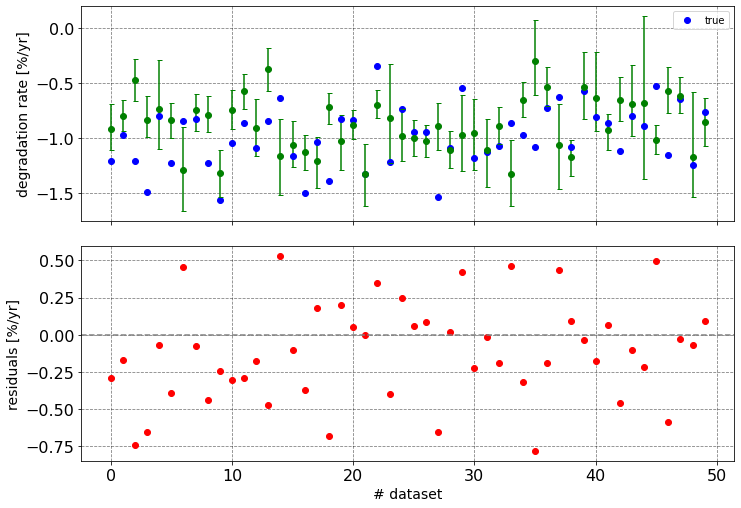

In [163]:
fig, ax = plt.subplots(2, 1, figsize=(10, 7), sharex=True)
fig.tight_layout()

ax[0].plot(rd[1], "bo", label="true")
ax[0].errorbar(np.arange(0, 50), rd[2][:, 0], yerr=[rd[2][:, 0]-rd[2][:, 1], rd[2][:, 2]-rd[2][:, 0]], 
               fmt="o", color="green", capsize=2.5)
#ax[0].plot(rd[2][:, 0], "go", label="estimated")
#ax[0].fill_between(np.arange(0, 50), rd[2][:, 1], rd[2][:, 2], color="green", alpha=0.4)
ax[1].plot(rd[1]-rd[2][:, 0], "ro")
ax[0].legend()

ax[0].set_ylabel("degradation rate [%/yr]", fontsize=14)
ax[1].set_ylabel("residuals [%/yr]", fontsize=14)
ax[1].set_xlabel("# dataset", fontsize=14)
ax[0].grid(which="both", ls="--", color="k", alpha=0.5)
ax[1].grid(which="both", ls="--", color="k", alpha=0.5)
ax[1].axhline(0., color="grey", ls="--")

rmse_rd = mean_squared_error(rd[1], rd[2][:, 0], squared=False)
print ("the RMSE for the degradation rate is %.3f percentage/year" %rmse_rd)

Text(0, 0.5, 'counts')

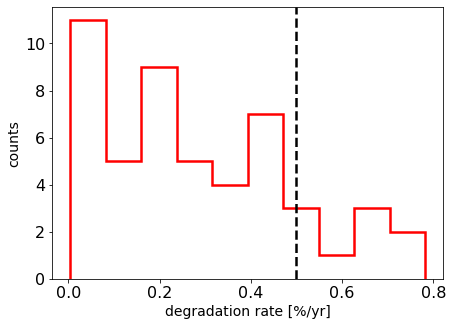

In [151]:
fig, ax = plt.subplots(figsize=(7, 5))
_, _, _ = ax.hist(rd[0], histtype="step", linewidth=2.5, color="red")
ax.axvline(0.5, lw=2.5, color="k", ls="--")
ax.set_xlabel("degradation rate [%/yr]", fontsize=14)
ax.set_ylabel("counts", fontsize=14)

**Soiling profile**

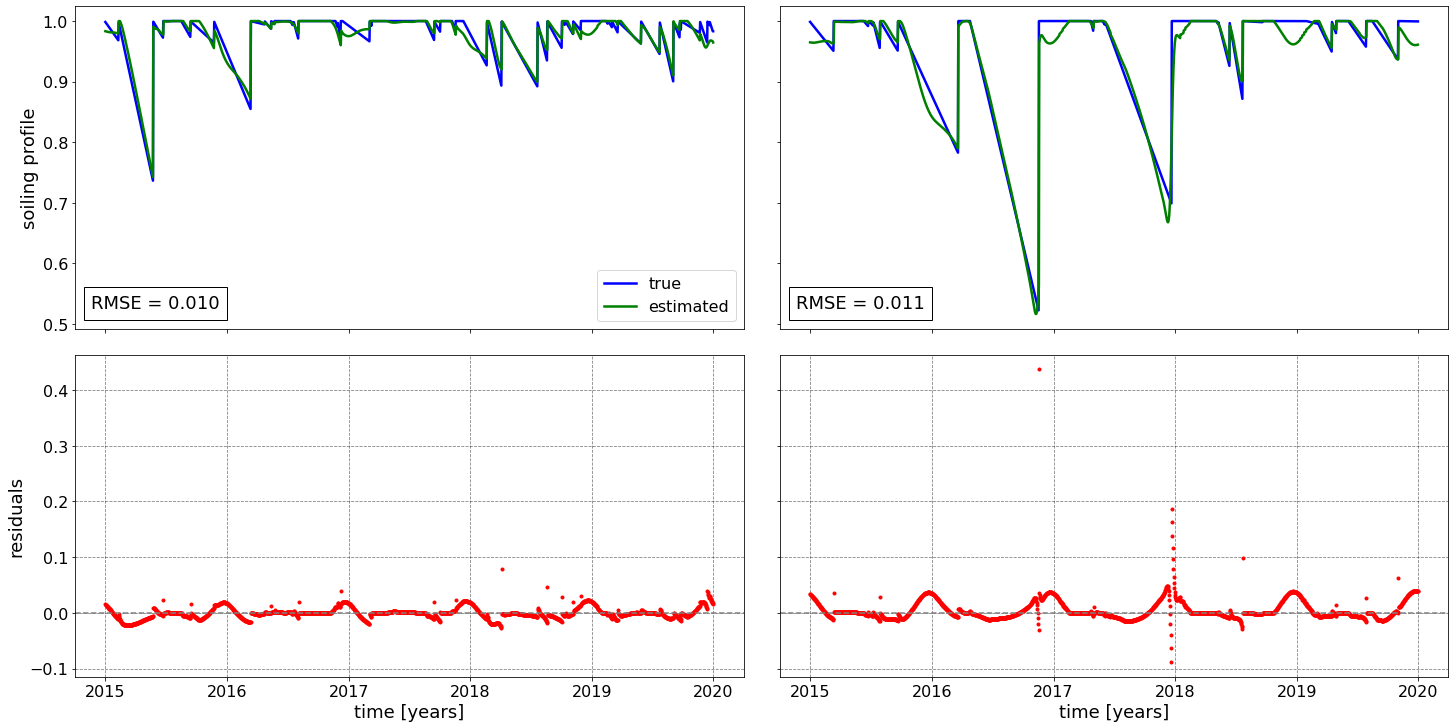

In [168]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10), sharex=True, sharey="row")
fig.tight_layout()


ax[0, 0].plot(sr[2].index, sr[2], color="blue", lw=2.5, ls="-", label="true")
ax[0, 0].plot(sr[3].index, sr[3], color="green", lw=2.5, ls="-", label="estimated")
ax[1, 0].plot(sr[2].index, sr[2]-sr[3], "r.")
text = AnchoredText(("RMSE = %.3f" %sr[0]), loc=3, prop=dict(size=18))
ax[0, 0].add_artist(text)
ax[0, 0].legend(loc=4, fontsize=16)

ax[0, 1].plot(sr[4].index, sr[4], color="blue", lw=2.5, ls="-", label="true")
ax[0, 1].plot(sr[5].index, sr[5], color="green", lw=2.5, ls="-", label="estimated")
ax[1, 1].plot(sr[4].index, sr[4]-sr[5], "r.")
text = AnchoredText(("RMSE = %.3f" %pi[1]), loc=3, prop=dict(size=18))
ax[0, 1].add_artist(text)

ax[0, 0].set_ylabel("soiling profile", fontsize=18)
ax[1, 0].set_ylabel("residuals", fontsize=18)
ax[1, 0].set_xlabel("time [years]", fontsize=18)
ax[1, 1].set_xlabel("time [years]", fontsize=18)
ax[1, 0].grid(which="both", ls="--", color="k", alpha=0.5)
ax[1, 0].axhline(0., color="grey", ls="--")
ax[1, 1].grid(which="both", ls="--", color="k", alpha=0.5)
ax[1, 1].axhline(0., color="grey", ls="--")